### DataFrame

### 1. DataFrame - 생성
    DataFrame은 2차원 배열형식. 표같은 스프레드시트 자료구조
    여러개의 컬럼을 가지며 서로 다른 종류의 값이 담긴다.
    
    DataFrame은 다양한 방식으로 생성되지만
    가장 흔하게 생성하는 방법으로
    1)리스트를 값으로 가지는 딕셔너리 방법으로 생성
    2)Numpy 배열을 이용해서 생성
    3)read_csv(), read_excel()함수등을 이용해서 생성

In [1]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
df_dic = {
        'state':['Ohio','Ohio', 'Ohio','Nevada','Nevada','Nevada'],
        'year': [2000,   2001,   2002,   2001,   2002,   2003],
         'pop': [ 1.5,   1.7,    3.6,    2.4,    2.9,    3.2]    
}

dicDf=DataFrame(df_dic)
dicDf

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [9]:
# 시리즈가 모여 데이터프레임이 되기에 series가 type이다.
print(type(dicDf.state))
print(type(dicDf.year))
#내장되어져 있는 변수명을 썼기에 'method'가 나온다.
print(type(dicDf.pop))

#따라서 아래와 같이 써야한다.
#혹시 모를 변수가 있기 때문에 아래와 같이 사용하는 것이 좋다.
print(type(dicDf['pop']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'method'>
<class 'pandas.core.series.Series'>


In [11]:
data1 = {
    'name' :['james', 'tom', 'jane', 'peter'],
    'address' : ['NY', 'Texas', 'NY', 'LA'],
    'age' : [33, 44, 55, 66]
}

df1 = DataFrame(data1)
df1

,name,address,age
0,james,NY,33
1,tom,Texas,44
2,jane,NY,55
3,peter,LA,66


In [42]:
# 2 random 모듈 사용
df2 = DataFrame(np.random.randint(10, 100, 16).reshape(4,4), 
               columns=list('abcd'), 
               index = list('abcd'))
#컬럼값들을 다 수정... columns
df2.columns = ['one', 'two','three','four']
df2 
# 이를 보면 데이터프레임도 원본에 바로 반영된다는 것을 알 수 있다.

,one,two,three,four
a,36,61,38,43
b,44,57,96,66
c,70,92,38,47
d,82,27,96,80


#### 날짜 생성

판다스가 가지고 있는 장점 중 하나가 시계열 데이타 처리를 잘 해 준다.  
간단히 날짜만 생성해보고  인덱스로 지정하는 것까지 해보자


In [46]:
## 2020년 1월 1일부터 날짜를 시작할 것이다.
# periods = 10  => 10일까지 유지된다.
dates = pd.date_range('20200101', periods=10)

dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [48]:
datedf = DataFrame(np.random.randn(10, 4), index = dates, columns = list('abcd'))
datedf

,a,b,c,d
2020-01-01,-0.918435,0.889219,-1.004566,-0.730800
2020-01-02,-1.138008,1.259276,-0.402026,-1.261525
2020-01-03,-0.320383,-1.229036,0.855644,0.263529
2020-01-04,-1.843245,-0.790572,-0.556018,2.976895
2020-01-05,0.470597,1.436903,0.667631,0.393141
2020-01-06,0.301575,0.597904,1.977566,0.056450
2020-01-07,-0.678026,-0.001132,-0.214631,0.158375
2020-01-08,0.479278,0.345291,0.452520,0.896195
2020-01-09,1.543163,0.895942,1.757264,-2.412653
2020-01-10,0.393661,0.757100,0.984100,-0.675679


In [78]:
# CSV 파일 읽어서 데이터 프레임 생성

df3 = pd.read_csv('../dataset/tips.csv')
df3


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


### 2.  DataFrame - 구조확인

* index
* columns
* values

In [81]:
print(df1.index)
print(df1.columns)
print(df1.values)
print(df1.T)

RangeIndex(start=0, stop=4, step=1)
Index(['name', 'address', 'age'], dtype='object')
[['james' 'NY' 33]
 ['tom' 'Texas' 44]
 ['jane' 'NY' 55]
 ['peter' 'LA' 66]]
             0      1     2      3
name     james    tom  jane  peter
address     NY  Texas    NY     LA
age         33     44    55     66


### 4.  DataFrame - 조회함수 1.

* head()   -  앞에서 5개 조회
* tail()   -  뒤에서 5개 조회
* head(10) -  앞에서 10개 조회
* tail(10) -  뒤에서 10개 조회

In [85]:
df3.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [87]:
df3.tail()

,total_bill,tip,sex,smoker,day,time,size
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN


### 4.  DataFrame - 조회함수 2.

* describe()  - 각 컬럼에 대한 요약 통계 제공
* info()  - 각 컬럼별 정보확인
* value_counts()


`describe`

In [95]:
df3.describe() # describe함수는 numeric한, 즉 숫자형으로 되어있는 컬럼에 대해서만 출력한다.


,total_bill,tip,size
count,245.000000,244.000000,244.000000
mean,19.808612,2.998279,2.569672
std,8.891234,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.370000,2.000000,2.000000
50%,17.810000,2.900000,2.000000
75%,24.270000,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [94]:
df3.describe(include = 'object') # object여도 describe를 쓸 수는 있지만 잘 사용하지는 않는다.

# unique는 중복을 벗겨내주는 역할을 한다. 
#성별을 예로 들면 성별은 남, 여로 구별되어 있기에 2로 나온 것이다. 중복을 제거한 것이라고 볼 수 있다.
# sql로 따지면 distinct라고 할 수 있다.

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


`info`

In [99]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  245 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
dtypes: float64(3), object(4)
memory usage: 13.5+ KB


In [92]:
df3.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

`value_counts`

####  특정 컬럼에 대한 데이터가 어떻게 분포되었는지를 보여주는 기능
#### 아주 아주 많이 사용됨.... 꼭 기억!
#### value_counts를 사용할 때는 꼭 특정한 컬럼을 지정해서 사용

In [102]:
df3['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [108]:
df3['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [105]:
df3['size'].value_counts()
# 2명이 가장 많기에 커플끼리 오기에 가장 좋은 레스토랑이라고 추측할 수 있다.

2.0    156
3.0     38
4.0     37
5.0      5
1.0      4
6.0      4
Name: size, dtype: int64

In [106]:
df3['total_bill'].value_counts() 
# numeric 컬럼에는 value_counts()가 별 의미가 없기에 잘 사용하지 않는다.
# numeric 컬럼이여도 의미상으로 카테고리 컬럼이라면 value_counts()를 사용한다.

13.42    3
13.81    2
10.07    2
17.92    2
13.00    2
        ..
24.71    1
21.16    1
28.97    1
22.49    1
25.34    1
Name: total_bill, Length: 230, dtype: int64

### 5.  DataFrame - 타입변경

* astype()

In [110]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  245 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
dtypes: float64(3), object(4)
memory usage: 13.5+ KB


In [112]:
df3['total_bill'].astype('int').head(5) # astype('int')는 47.9달러면 소수점은 자른다.
df3['total_bill'].astype(np.int32).head(5)

0    16
1    10
2    21
3    23
4    24
Name: total_bill, dtype: int32

In [114]:
df3['total_bill'].head()
#원본데이터 손실을 막기 위해 astype은 바로 반영이 안된다.

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

In [116]:
df3['total_bill'] = df3['total_bill'].astype(np.int32)

In [117]:
df3['total_bill'].head()

0    16
1    10
2    21
3    23
4    24
Name: total_bill, dtype: int32

### 6. DataFrame - 정렬하기

sort_index(), sort_values()  
2가지 방식이 있는데 그 중에서 sort_values()는 정말 많이 사용된다.

#### sort_index()  
인덱스 기준으로 정렬

In [124]:
df3.sort_index().head(5)
df3.sort_index(ascending = True).head(5) # 오름차순. 디폴트값임.
df3.sort_index(ascending = False).head(5) # 내림차순

,total_bill,tip,sex,smoker,day,time,size
244,25,NaN,NaN,NaN,NaN,NaN,NaN
243,18,3.00,Female,No,Thur,Dinner,2.0
242,17,1.75,Male,No,Sat,Dinner,2.0
241,22,2.00,Male,Yes,Sat,Dinner,2.0
240,27,2.00,Female,Yes,Sat,Dinner,2.0


#### sort_valeus()
값 기준으로 정렬  
index로 정렬할 일은 그리 많지 않다.  
우리가 엑셀 파일에서 사실상 컬럼 기준으로 정렬을 많이 한다.  


In [126]:
df3.head()

,total_bill,tip,sex,smoker,day,time,size
0,16,1.01,Female,No,Sun,Dinner,2.0
1,10,1.66,Male,No,Sun,Dinner,3.0
2,21,3.50,Male,No,Sun,Dinner,3.0
3,23,3.31,Male,No,Sun,Dinner,2.0
4,24,3.61,Female,No,Sun,Dinner,4.0


`step1`

In [128]:
df3.sort_values(by = 'tip').head()
#동률의 데이터가 여러개 나옴

,total_bill,tip,sex,smoker,day,time,size
67,3,1.00,Female,Yes,Sat,Dinner,1.0
236,12,1.00,Male,Yes,Sat,Dinner,2.0
92,5,1.00,Female,Yes,Fri,Dinner,2.0
111,7,1.00,Female,No,Sat,Dinner,1.0
0,16,1.01,Female,No,Sun,Dinner,2.0


`step2`

In [131]:
df3.sort_values(by = ['tip', 'total_bill']).head()

,total_bill,tip,sex,smoker,day,time,size
67,3,1.00,Female,Yes,Sat,Dinner,1.0
92,5,1.00,Female,Yes,Fri,Dinner,2.0
111,7,1.00,Female,No,Sat,Dinner,1.0
236,12,1.00,Male,Yes,Sat,Dinner,2.0
0,16,1.01,Female,No,Sun,Dinner,2.0


In [132]:
df3.sort_values(by = ['total_bill', 'tip']).head()
# by 안에 뭐를 먼저 넣느냐에 따라 정렬 순서가 달라지고, 이로 인해 뽑아내는 데이터가 달라진다.

,total_bill,tip,sex,smoker,day,time,size
67,3,1.00,Female,Yes,Sat,Dinner,1.0
92,5,1.00,Female,Yes,Fri,Dinner,2.0
111,7,1.00,Female,No,Sat,Dinner,1.0
195,7,1.44,Male,No,Thur,Lunch,2.0
218,7,1.44,Male,Yes,Sat,Dinner,2.0


`step3`

In [134]:
df3.sort_values(by = ['tip', 'total_bill'],ascending=False).tail()

,total_bill,tip,sex,smoker,day,time,size
236,12,1.0,Male,Yes,Sat,Dinner,2.0
111,7,1.0,Female,No,Sat,Dinner,1.0
92,5,1.0,Female,Yes,Fri,Dinner,2.0
67,3,1.0,Female,Yes,Sat,Dinner,1.0
244,25,NaN,NaN,NaN,NaN,NaN,NaN


### 문제 1. 

요일별, 팁별로 데이타를 정열합니다.  
이때, 요일별은 내림차순,팁은 오름차순으로 정렬되도록 하세요  
마지막으로 데이타는 끝에서 7개만 출력합니다.



In [138]:
df3.sort_values(by = ['day', 'tip'], ascending=[False, True]).tail(7)

,total_bill,tip,sex,smoker,day,time,size
94,22,3.25,Female,No,Fri,Dinner,2.0
221,13,3.48,Female,Yes,Fri,Lunch,2.0
91,22,3.50,Male,No,Fri,Dinner,2.0
96,27,4.00,Male,Yes,Fri,Dinner,2.0
93,16,4.30,Female,Yes,Fri,Dinner,2.0
95,40,4.73,Male,Yes,Fri,Dinner,4.0
244,25,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

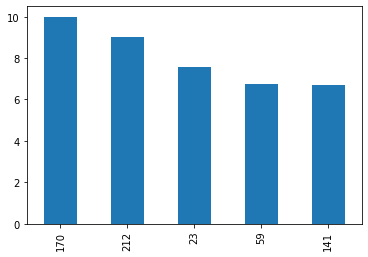

In [142]:
df3.sort_values(by = ['tip'], ascending=False).head()['tip'].plot(kind = 'bar')

### 7. DataFrame - 컬럼명 변경및 추가, 삭제하기

### 컬럼명 변경하기

#### 1) 컬럼명 전체 수정
 -   **columns**  
    원본이 바로 변경됨
    
 -  **rename**  
    원본변경 안됨  
    inplace = True옵션 지정  
    
    원본 변경 안될 시
    1. 재대입 (권장)
    2. inplace = True

In [143]:
df2

,one,two,three,four
a,36,61,38,43
b,44,57,96,66
c,70,92,38,47
d,82,27,96,80


In [144]:
df2.columns = ['python', 'da', 'deep', 'django']
df2

,python,da,deep,django
a,36,61,38,43
b,44,57,96,66
c,70,92,38,47
d,82,27,96,80


In [150]:
df1_new = df1.rename(columns={'address': 'addr'})
df1_new

# 재대입

,name,addr,age
0,james,NY,33
1,tom,Texas,44
2,jane,NY,55
3,peter,LA,66


In [151]:
df1.rename(columns={'address': 'addr'}, inplace= True)
df1

# inplace, 그러나 비권장

,name,addr,age
0,james,NY,33
1,tom,Texas,44
2,jane,NY,55
3,peter,LA,66


In [153]:
#컬럼 추가하기

df1['phone']= np.nan
df1

,name,addr,age,phone
0,james,NY,33,NaN
1,tom,Texas,44,NaN
2,jane,NY,55,NaN
3,peter,LA,66,NaN
